<a href="https://colab.research.google.com/github/ThiagoMonica/Imersao_Dados_Alura/blob/main/Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 5 - Imersão de Dados da Alura
###Machine Learning e Sci-kit learning

Nessa quinta e última aula de imersão, operamos algumas técnicas de machine learning com Sci-kit learning para criar alguns modelos treinando e testando os mesmos para resolver alguns uns problemas.

In [2]:
#Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Captura da fonte dos dados a serem utilizados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

#Leitura dos dados a partir do arquivo .zip
dados = pd.read_csv(url_dados, compression = 'zip')

mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

###Regressão Logística

Regressão Logística é um algoritmo de Machine Learning usado para prever a probabilidade de uma variável receber determinada categoria. Neste algoritmo, a variável resultante é binária que pode receber 1 (sucesso) ou 0 (fracasso).

Nesse caso, queremos construir um modelo que possa prever se uma assinatura vai ou não ativar pelo menos um MOA.

In [3]:
#Criamos os dados combinados com n_moa, ativo_moa e o restante da tabela dados
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa','ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
#Imports das libs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Selecionamos apenas as assinaturas
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

#Criamos subconjuntos para treino (80%) e teste (20%), mantendo a proporção de ativo_moa e congelando a aleatoriedade da distribuição
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Inicializamos o modelo com um máximo de 1000 iterações
modelo_rlogistica = LogisticRegression(max_iter=1000)

#Treinamos o modelo com as assinaturas e as respostas
modelo_rlogistica.fit(x_treino, y_treino)

#Testamos o modelo com as assinaturas e as respostas esperadas
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

O número acima significa que nosso modelo obteve uma porcentagem de acerto de 62.7%. Ou seja, 62.7% das vezes que a assinatura ativava ou não um MOA, nosso modelo acertava ao dizer que tal assinatura ativava ou não um MOA.

Para termos uma referência de qualidade dessa porcetagem, ou seja, se é uma boa quantidade de acerto ou não, podemos criar um modelo *dummy* que classifica todos com apenas um valor. Assim, temos um parâmetro de eficiência do nosso modelo. Se a porcentagem de acerto do modelo dummy for maior ou próxima do nosso modelo de regressão logística, significa que nosso modelo não foi muito eficiente.

In [ ]:
#Import libs
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

#Modelo dummy diz que todos n_moa são o valor mais frequente em n_moa do treino
modelo_dummy = DummyClassifier('most_frequent')

#Treina o modelo com as assinaturas e as respostas
modelo_dummy.fit(x_treino, y_treino)

#Preve as respostas para o conjunto de teste x
previsão_dummy = modelo_dummy.predict(x_teste)

#Ve a acurácia comparada com o conjunto de teste y
accuracy_score(y_teste, previsão_dummy) 

0.6067604450976275

Aqui podemos ver que ele acerta justamente todos as assinaturas que ativaram pelo menos um MOA que e erra as que não ativaram nenhum MOA.

In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

Com os resultados obtidos, podemos concluir que a técnica de regressão logística não é muito eficiente para o problema dado que ele acertou 62.7% dos casos e o modelo dummy acertou 60.7%.

###Árvore de Decisão

Podemos usar outros métodos de *Machine Learning* para achar modelos melhores para responder nosso problema. Um exemplo é a **árvore de decisão**.

O algoritmo de árvore de decisão é um método de aprendizado supervisionado usado para classificação e regressão. Seu objetivo é criar um modelo que preve o valor de uma variável através de um aprendizado de nós de decisão inferidos dos dados. 


In [ ]:
#Import libs
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Cria árvore com no máximo 3 niveis de profundidade
modelo_arvore = DecisionTreeClassifier(max_depth=3)

#Treina modelo
modelo_arvore.fit(x_treino, y_treino)

#Testa o modelo
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

Com a árvore de decisão, obtivemos 61% de eficiência, ainda pior que nosso modelo de regressão logística

Podemos ver como foi a árvore resultante e o conteúdo de seus nós.

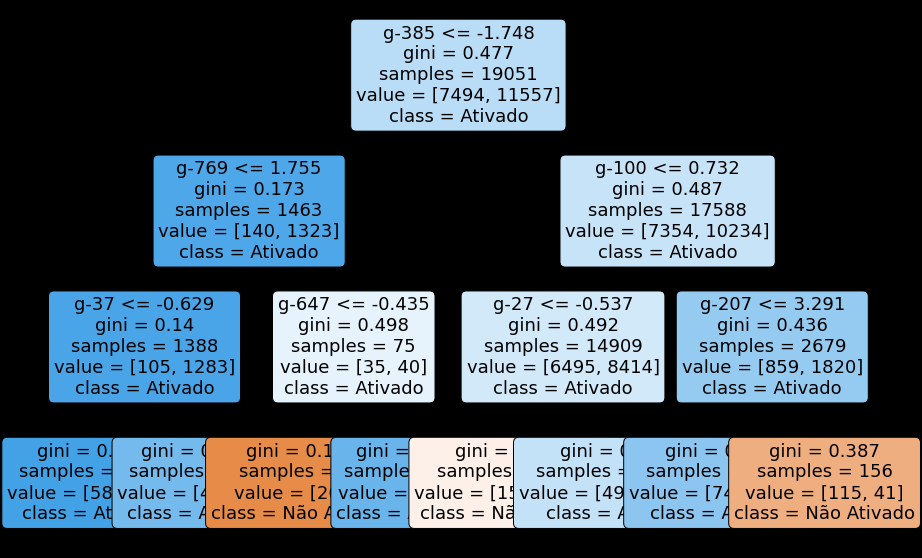

In [ ]:
#Import lib
from sklearn import tree

#Define tamanho da imagem
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')

#Plota a arvore
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=18,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

Na árvore, vemos que o nó raiz de decisão foi constrúido a partir da classe g-385. Ou seja, se a assinatura possuir g-385 menor ou igual a -1.748 ele cai na filho à esquerda, caso contrário ele segue o caminho do filho à direita. Essa lógica é aplicada a todos os nós até chegar às folhas da árvore.

Podemos testar várias árvores de acordo com sua profundidade. Assim, conseguimos perceber se o modelo piora ou melhor ao mudar a profundidade.

In [ ]:
#Import libs
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Cria modelos com arvores de 1 a 15 nos de profundidade
teste=[]
treino=[]
for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth=i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))

In [ ]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6208272097417594,
 0.6199874028973336,
 0.6187276926306949,
 0.6216670165861852,
 0.6204073063195465,
 0.6164182238085241,
 0.6145286584085661,
 0.6124291412975016,
 0.5977325215200504,
 0.5981524249422633,
 0.5998320386311149]

In [ ]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6606477350270327,
 0.6707259461445594,
 0.689570101307018,
 0.7068395359823632,
 0.7294105296309905,
 0.7530838276205973,
 0.7770720697076269,
 0.7991706472101202]

Os resultados obtidos mostram que o conjunto de treino melhora e o conjunto de testes piora de acordo com as profundidades. Quanto maior a profundidade, maior a quantidade de treino. Um possível problema de treinar muito é o *over-fitting*, no qual o modelo se especializa muito nos dados de treino e não consegue acertar entrada de dados gerais.

O gráfico mostra que o modelo sofreu um *overfit* ao longo dos treinamentos.

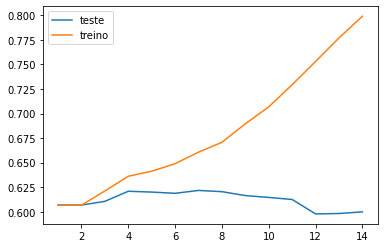

In [ ]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')

A função `get_dummies()` transforma valores categóricos em colunas binárias

In [ ]:
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [ ]:
#Conversão de todas as colunas categóricas em binários
pd.get_dummies(dados_combinados, columns=['tratamento','dose','tempo'])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.

###Random Forest

Outra técnica de *Machine Learning* é a **Random Forest**. Essa técnica estimadora que comporta um número de árvores de decisão em vários subconjusto dos dados e utilaza a média dos resultados para melhorar a preditividade e o controle de *over-fitting*.

Também utilizamos essa técnica para resolver nosso problema inicial.

In [ ]:
#import libs
from sklearn.ensemble import RandomForestClassifier

#Criamos os dados, todos contínuos com os dummies
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Treinamos e testamos o modelo
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6836027713625866

Com o resultado de 68.3% vemos que nenhuma das três técnicas consegue resolver de forma eficiente nosso problema.

####Desafio - Tente outros modeloes ou mude os parametros dos modelos que testamos em aula



Aqui usamos novamente a árvore de decisão, porém com algumas diferenças:

- A amostra de teste representa 25% dos dados. Ou seja, nosso poder de treino diminuiu comparada com a outra árvore, mas há mais poder de teste.

- Máxima da profundidade é 5.

In [10]:
#Import libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25, stratify=y,random_state=900)

#Cria árvore com no máximo 3 niveis de profundidade
modelo_arvore = DecisionTreeClassifier(max_depth=5)

#Treina modelo
modelo_arvore.fit(x_treino, y_treino)

#Testa o modelo
modelo_arvore.score(x_teste, y_teste)

0.687940880080618

Atingimos **68.8%** de eficiência. 7 pontos percentuais melhor que o outro modelo de árvore.

Podemos testar com outros modelos, como o Perceptron, com o qual atingimos **61.6%** de eficiência.

In [5]:
##Perceptron
from sklearn.linear_model import Perceptron

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

modelo_perceptron = Perceptron()
modelo_perceptron.fit(x_treino, y_treino)
modelo_perceptron.score(x_teste, y_teste)

0.6159983203863112

Também foi testado um modelo *Passive Agressive*. Foi atingido 55% de eficiência, o que o trona pior que nosso modelo *dummy*.

In [8]:
##Passivo Agressivo
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

modelo_pass_agres = PassiveAggressiveClassifier()
modelo_pass_agres.fit(x_treino, y_treino)

#Preve as respostas para o conjunto de teste x
previsão_pass_agress = modelo_pass_agres.predict(x_teste)

#Ve a acurácia comparada com o conjunto de teste y
accuracy_score(y_teste, previsão_pass_agress) 

0.5504933865211001

####Teste outros problemas

Anteriormente, estavamos respondendo se uma determinada assinatura podia ativar ou não pelo menos um MOA. Podemos mudar nosso problema. Uma assinatura pode ou não ativar pelo menos 2 MOAs?

In [12]:
#Nova coluna que sera target do nosso modelo
dados_combinados['ativo_moa_2'] = (dados_combinados['n_moa'] >= 2)
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,ativo_moa_2
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


Aqui usamos um modelo dummy para "chutar" todos os valores como o mais frequente na classe ativo_moa_2.

In [18]:
dados_combinados['ativo_moa_2'].value_counts(normalize=True)

False    0.919585
True     0.080415
Name: ativo_moa_2, dtype: float64

Ou seja, fala que em todas as assinaturas nenhuma ativou pelo menos 2 MOAs. E obtemos um número alto: 92% de eficiência.

In [14]:
##Dummy como parametro
#Import libs
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa_2']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Modelo dummy diz que todos n_moa são o valor mais frequente em n_moa do treino
modelo_dummy = DummyClassifier('most_frequent')

#Treina o modelo com as assinaturas e as respostas
modelo_dummy.fit(x_treino, y_treino)

#Preve as respostas para o conjunto de teste x
previsão_dummy = modelo_dummy.predict(x_teste)

#Ve a acurácia comparada com o conjunto de teste y
accuracy_score(y_teste, previsão_dummy) 

0.9195884946462314

Com a regressão logística, obtivemos 95% de eficiência.

In [16]:
##Regressão Linear
#Imports das libs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa_2']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Inicializamos o modelo com um máximo de 1000 iterações
modelo_rlogistica = LogisticRegression(max_iter=1000)

#Treinamos o modelo com as assinaturas e as respostas
modelo_rlogistica.fit(x_treino, y_treino)

#Testamos o modelo com as assinaturas e as respostas esperadas
modelo_rlogistica.score(x_teste, y_teste)

0.9506613478899854

Com a árvore de decisão o resultado foi parecido: 95.1% de eficiência.

In [17]:
##Árvore de Decisão
#Import libs
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['ativo_moa_2']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Cria árvore com no máximo 5 niveis de profundidade
modelo_arvore = DecisionTreeClassifier(max_depth=5)

#Treina modelo
modelo_arvore.fit(x_treino, y_treino)

#Testa o modelo
modelo_arvore.score(x_teste, y_teste)

0.9515011547344111

Com esses resultados podemos concluir que prever se uma assinatura ativa ou não pelo menos 2 MOAs não é muito eficaz, dado que a distribuição é muito desigual (92% de assinaturas dos dados de treino assumem um mesmo valor). Logo, nossos modelos de machine learning não podem acrescentar grandes ganhos nesse quesito.

####Desafio - Escolher a droga mais utilizada e tente criar um modelo para prever esta label

Suponhamos que perdemos alguns nomes de compostos nos laboratórios. Podemos usar machine learning para descobrir se determinado composto é o mais utilizado?

Sim, podemos!

Primeiro criamos a coluna que será o target do nosso modelo.

In [26]:
top_composto = dados_combinados['composto'].value_counts().index[0]

dados_combinados[str(top_composto)] = (dados_combinados['composto'] == top_composto)
dados_combinados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,ativo_moa_2,cacb2b860
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,

Agora criamos nosso modelo dummy que supõe que todos os experimentos foram feitos com compostos diferentes de *cacb2b860*. E obtivemos 92.2% de eficiência. 

In [28]:
##Dummy como parametro
#Import libs
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto','cacb2b860'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['cacb2b860']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Modelo dummy diz que todos n_moa são o valor mais frequente em n_moa do treino
modelo_dummy = DummyClassifier('most_frequent')

#Treina o modelo com as assinaturas e as respostas
modelo_dummy.fit(x_treino, y_treino)

#Preve as respostas para o conjunto de teste x
previsão_dummy = modelo_dummy.predict(x_teste)

#Ve a acurácia comparada com o conjunto de teste y
accuracy_score(y_teste, previsão_dummy) 

0.9216880117572959

Com a regressão linear, obtivemos 100% de acerto.

In [33]:
##Regressão Linear
#Imports das libs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto','cacb2b860'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['cacb2b860']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Inicializamos o modelo com um máximo de 1000 iterações
modelo_rlogistica = LogisticRegression(max_iter=1000)

#Treinamos o modelo com as assinaturas e as respostas
modelo_rlogistica.fit(x_treino, y_treino)

#Testamos o modelo com as assinaturas e as respostas esperadas
modelo_rlogistica.score(x_teste, y_teste)

1.0

O mesmo aconteceu com a árvore de decisão.

In [34]:
##Árvore de Decisão
#Import libs
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa','ativo_moa_2','composto','cacb2b860'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','dose','tempo'])
y = dados_combinados['cacb2b860']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y,random_state=376)

#Cria árvore com no máximo 5 niveis de profundidade
modelo_arvore = DecisionTreeClassifier(max_depth=5)

#Treina modelo
modelo_arvore.fit(x_treino, y_treino)

#Testa o modelo
modelo_arvore.score(x_teste, y_teste)

1.0

Nesse caso, houve um raro caso em que os modelos conseguiram 100% de eficiência, ou seja, acertou, dentre todos os experimentos, se foi realizado com o composto *cacb2b860* ou não. E ainda apresentou ganhos comparado ao nosso modelo dummy.

####Desafio - Resumo

Resumo do que foi aprendido:

*   Manipular sklearn

*   Regressão logística

*   Árvore de decisão

*   Random Forest